In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [23]:
df = pd.read_csv('train.csv')
print("Shape of dataset:", df.shape)

Shape of dataset: (614, 13)


In [24]:
print("Column names:", df.columns.tolist())

Column names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [25]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [26]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

In [27]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col]) 

In [30]:
if 'Loan_ID' in df.columns:
    df = df.drop(columns=['Loan_ID'])

In [31]:
print(df.describe())


           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.0000

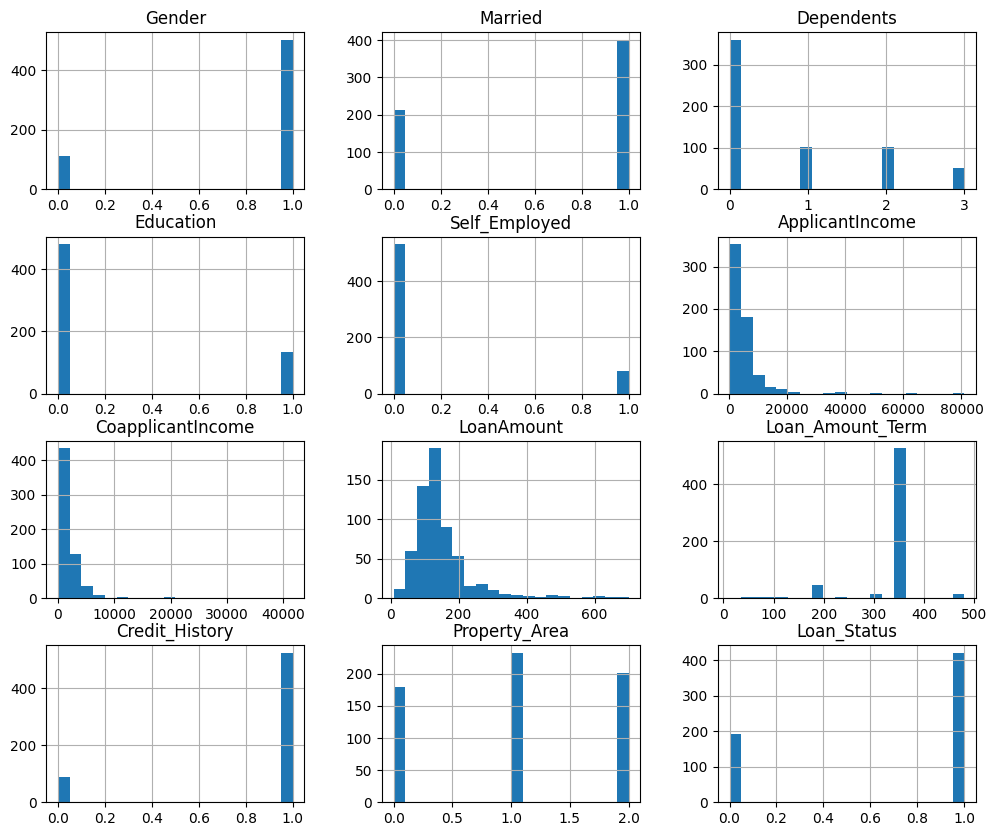

In [32]:
df.hist(figsize=(12,10), bins=20)
plt.show()

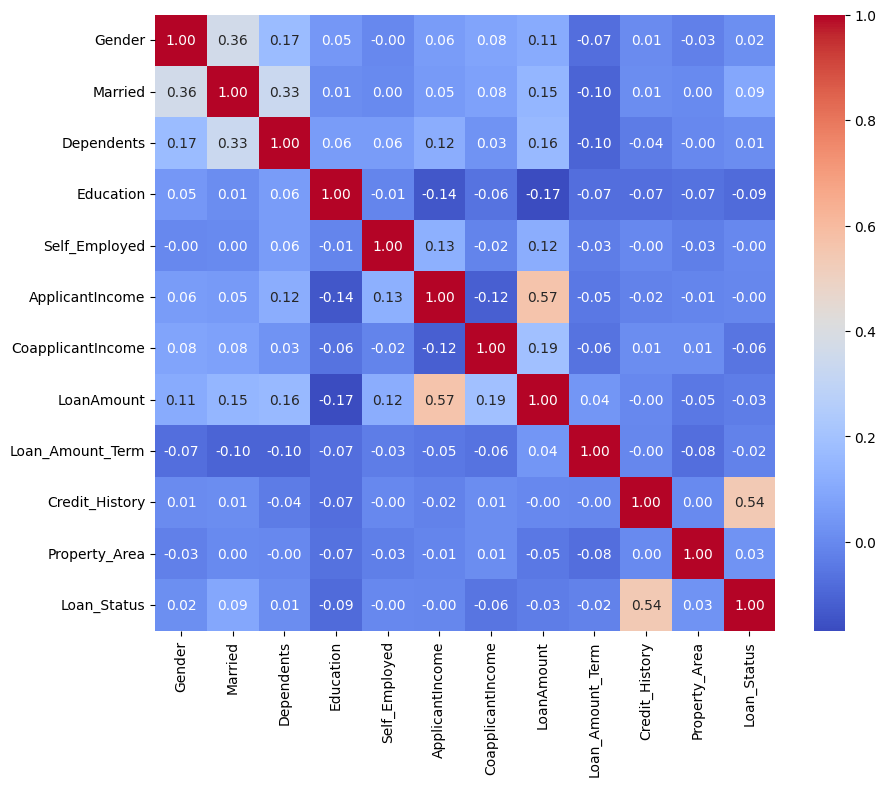

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [35]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
y_pred = model.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7837837837837838
Precision: 0.7564102564102564
Recall: 0.9833333333333333
F1 Score: 0.855072463768116


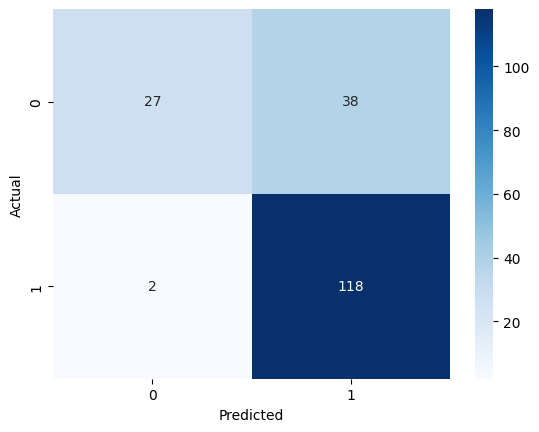

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [42]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coeff_df['Impact'] = coeff_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)


              Feature  Coefficient    Impact
9      Credit_History     3.131207  Positive
1             Married     0.702859  Positive
2          Dependents     0.164046  Positive
8    Loan_Amount_Term     0.000473  Positive
5     ApplicantIncome    -0.000010  Negative
6   CoapplicantIncome    -0.000018  Negative
7          LoanAmount    -0.001007  Negative
4       Self_Employed    -0.022007  Negative
10      Property_Area    -0.057786  Negative
3           Education    -0.247790  Negative
0              Gender    -0.593200  Negative
